# Epicurious - Recipes with Rating and Nutrition



In [1]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from warnings import filterwarnings
filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [30]:
epicurious = pd.read_csv("epi_r.csv")

# 1.EDA (Exploratory Data Analysis)

In [31]:
epicurious.head(2)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
epicurious.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Data columns (total 680 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    title                     object 
 1    rating                    float64
 2    calories                  float64
 3    protein                   float64
 4    fat                       float64
 5    sodium                    float64
 6    #cakeweek                 float64
 7    #wasteless                float64
 8    22-minute meals           float64
 9    3-ingredient recipes      float64
 10   30 days of groceries      float64
 11   advance prep required     float64
 12   alabama                   float64
 13   alaska                    float64
 14   alcoholic                 float64
 15   almond                    float64
 16   amaretto                  float64
 17   anchovy                   float64
 18   anise                     float64
 19   anniversary               float64
 20   anth

In [35]:
epicurious.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,20052.0,3.714467,1.340829,0.0,3.75,4.375,4.375,5.0
calories,15935.0,6322.958017,359046.041242,0.0,198.00,331.000,586.000,30111218.0
protein,15890.0,100.160793,3840.318527,0.0,3.00,8.000,27.000,236489.0
fat,15869.0,346.877497,20456.106859,0.0,7.00,17.000,33.000,1722763.0
sodium,15933.0,6225.974895,333318.188891,0.0,80.00,294.000,711.000,27675110.0
...,...,...,...,...,...,...,...,...
cookbooks,20052.0,0.000150,0.012231,0.0,0.00,0.000,0.000,1.0
leftovers,20052.0,0.000349,0.018681,0.0,0.00,0.000,0.000,1.0
snack,20052.0,0.001396,0.037343,0.0,0.00,0.000,0.000,1.0
snack week,20052.0,0.000948,0.030768,0.0,0.00,0.000,0.000,1.0



**Cleaning Data**

Let's limit the dataframe to have only recipes which are less than 10,000 calories. We also will clean the data by dropping rows which have null values.


In [71]:
epicurious = epicurious[epicurious['calories'] < 10000].dropna()

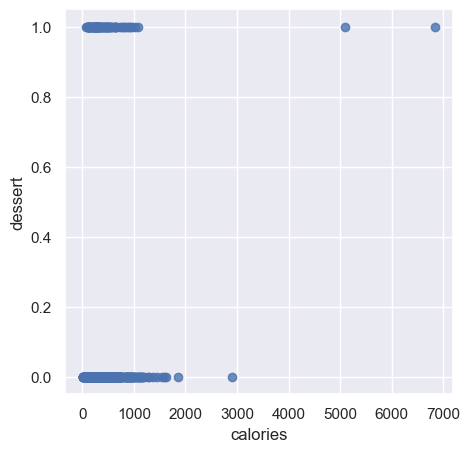

In [72]:
sns.set(style="darkgrid")
g = sns.regplot(x="calories", y="dessert", data=epicurious, fit_reg=False)
g.figure.set_size_inches(5, 5)



In [38]:
epicurious = epicurious[:][:500]      

In [39]:

epicurious.drop("title", inplace = True, axis=1)

y = epicurious.dessert.values
X = epicurious.drop(["dessert"], axis = 1)

In [40]:
epicurious['dessert'].isnull().sum()

0

# 2.Logistic Regression
## 2.1.Set Model

In [41]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [42]:
loj_model.intercept_      # constant value
loj_model.coef_           # independent values

array([[-6.98803314e-02,  8.59879143e-03, -1.33958288e-01,
        -7.35094148e-02, -2.38249767e-03,  0.00000000e+00,
         0.00000000e+00, -8.26036691e-04,  0.00000000e+00,
        -2.05554727e-03,  3.01223214e-02,  0.00000000e+00,
         0.00000000e+00, -6.28363400e-01, -1.70989997e-01,
         3.42253529e-02,  0.00000000e+00,  1.76759920e-02,
         2.03919469e-01,  0.00000000e+00,  0.00000000e+00,
        -7.35968363e-01,  1.10342906e-01,  1.09447393e-01,
        -1.64300762e-02,  0.00000000e+00, -2.39852483e-02,
        -3.75442830e-02, -9.56255595e-03, -1.30360149e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -5.89266374e-02,  2.21198898e-03, -2.82613798e-01,
        -8.82604275e-02,  1.32485010e+00, -2.47728269e-01,
         0.00000000e+00, -1.48255378e-01,  0.00000000e+00,
        -5.74613539e-03, -8.66227167e-02, -6.85134220e-02,
         2.58898367e-05, -1.32876544e-03, -4.21484320e-03,
         8.90859391e-02, -5.62060852e-02, -2.42530923e-0

## Predict & Model Tuning

In [43]:
y_pred = loj_model.predict(X)        # predict
confusion_matrix(y, y_pred)          # confussion matrix

array([[411,   1],
       [  3,  85]], dtype=int64)

In [44]:
accuracy_score(y, y_pred)

0.992

In [45]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       412
         1.0       0.99      0.97      0.98        88

    accuracy                           0.99       500
   macro avg       0.99      0.98      0.99       500
weighted avg       0.99      0.99      0.99       500



In [46]:
# Model predict
loj_model.predict(X)[0:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0.])

In [47]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[9.94801299e-01, 5.19870137e-03],
       [9.97876279e-01, 2.12372071e-03],
       [9.72256124e-01, 2.77438761e-02],
       [9.96201763e-01, 3.79823700e-03],
       [9.99132497e-01, 8.67503392e-04],
       [9.98669874e-01, 1.33012596e-03],
       [9.99707215e-01, 2.92784820e-04],
       [9.27492381e-01, 7.25076190e-02],
       [1.37153737e-02, 9.86284626e-01],
       [9.94567910e-01, 5.43208997e-03]])

In [48]:


y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]
y_probs[0:20]

array([5.19870137e-03, 2.12372071e-03, 2.77438761e-02, 3.79823700e-03,
       8.67503392e-04, 1.33012596e-03, 2.92784820e-04, 7.25076190e-02,
       9.86284626e-01, 5.43208997e-03, 4.94676000e-03, 7.87979263e-04,
       9.33000893e-01, 5.36249767e-06, 9.12182873e-03, 6.67318673e-02,
       1.30031557e-02, 4.57764467e-02, 8.21658778e-03, 1.62201586e-02])

In [49]:
# giving limit for values

y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [50]:

y_pred[0:20]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [51]:
confusion_matrix(y, y_pred)

array([[411,   1],
       [  3,  85]], dtype=int64)

In [52]:
accuracy_score(y, y_pred)

0.992

In [53]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       412
         1.0       0.99      0.97      0.98        88

    accuracy                           0.99       500
   macro avg       0.99      0.98      0.99       500
weighted avg       0.99      0.99      0.99       500



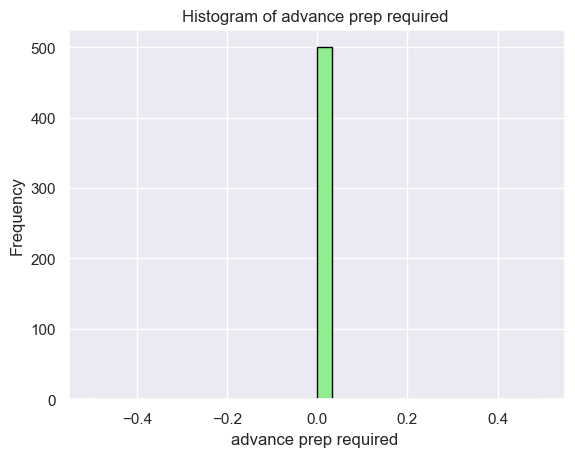

In [79]:
import matplotlib.pyplot as plt

plt.hist(epicurious.cookbooks, bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('advance prep required ')
plt.ylabel('Frequency')
plt.title('Histogram of advance prep required ')
plt.show()


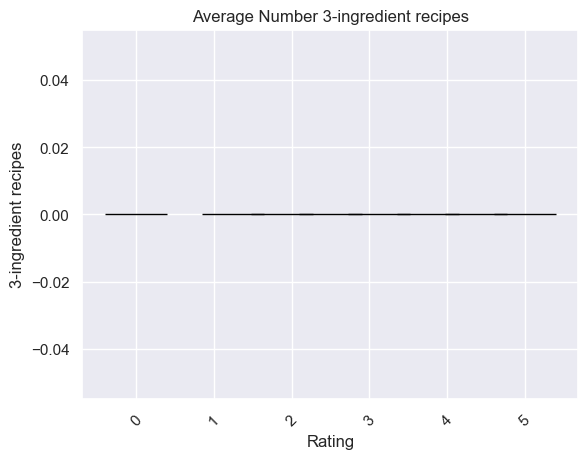

In [81]:

rating_counts = epicurious.groupby('rating')['3-ingredient recipes'].mean().reset_index()

plt.bar(rating_counts['rating'], rating_counts['3-ingredient recipes'], color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('3-ingredient recipes')
plt.title('Average Number 3-ingredient recipes')
plt.xticks(rotation=45) 
plt.show()


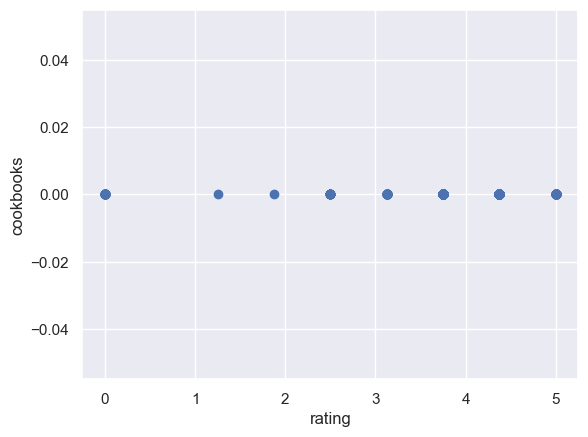

In [73]:
plt.scatter(epicurious.rating,epicurious.cookbooks)
plt.xlabel('rating')
plt.ylabel('cookbooks')
plt.show()

<Axes: >

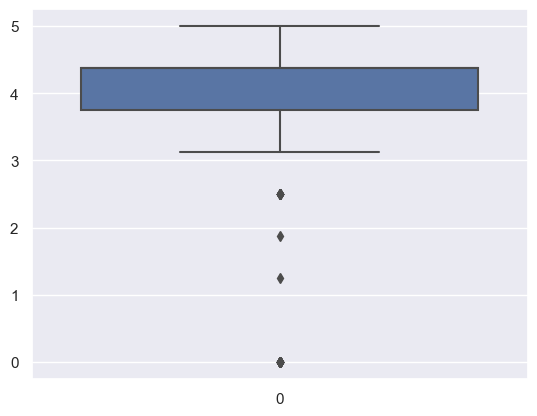

In [54]:
sns.boxplot(epicurious.rating)

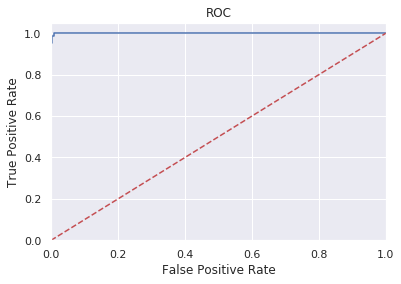

In [24]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

# blue line: which we set our model
# red line: if we dont do it what can we take result

In [25]:
# lets split test train set

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [26]:
# set model

loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
accuracy_score(y_test, loj_model.predict(X_test))

0.9666666666666667

In [28]:
# with cross validation 

cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.9194642857142858

# 3.Gaussian Naive Bayes

In [29]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [30]:
nb_model.predict(X_test)[0:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0.])

In [31]:
nb_model.predict_proba(X_test)[0:10]

array([[1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 6.32353549e-295],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 1.25607727e-166],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000]])

In [32]:
# predict
y_pred = nb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.94

In [33]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.7800595238095238

# 4.KNN
## 4.1.Predict & Model

In [34]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [35]:
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7533333333333333

In [36]:
# get detail print

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       122
         1.0       0.26      0.18      0.21        28

    accuracy                           0.75       150
   macro avg       0.54      0.53      0.53       150
weighted avg       0.72      0.75      0.73       150



## 4.2.Model Tunning

In [37]:
# find KNN parameters
knn_params = {"n_neighbors": np.arange(1,50)}

In [38]:
# fit model classification & CV

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [39]:
# this is only observation

print("Best score:" + str(knn_cv.best_score_))
print("Best parameters: " + str(knn_cv.best_params_))

Best score:0.84
Best parameters: {'n_neighbors': 4}


In [40]:
knn = KNeighborsClassifier(4)
knn_tuned = knn.fit(X_train, y_train)
knn_tuned.score(X_test, y_test)

0.7866666666666666

In [41]:
y_pred = knn_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7866666666666666

# 5.Random Forest

In [42]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9

## Model Tuning

In [44]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [45]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [46]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  7.9min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [47]:
print("Best Parameters: " + str(rf_cv_model.best_params_))

Best Parameters: {'max_depth': 10, 'max_features': 8, 'min_samples_split': 5, 'n_estimators': 10}


In [48]:
# using given parameters then create final model

rf_tuned = RandomForestClassifier(max_depth = 8, 
                                  max_features = 8, 
                                  min_samples_split = 5,
                                  n_estimators = 10)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
# tunned test model predict accuracy score

y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8266666666666667

##  Here’s a breakdown of the insights that could be drawn from each of these questions based on the dataset of recipes:

# 1. Most Common Ingredients in Highly Rated Recipes
Insight:

Identification of Key Ingredients: By analyzing the ingredients in the top-rated recipes, we can identify which ingredients are frequently used in these recipes. For example, if many high-rated recipes contain ingredients like garlic, olive oil, or fresh herbs, these could be considered "winning" ingredients.

User Preferences: Understanding these common ingredients can help in tailoring recommendations. If users often search for recipes with specific ingredients, emphasizing those in search results or suggested recipes can enhance user satisfaction.

Recipe Development: For content creators, knowing which ingredients correlate with high ratings can inform new recipe development, guiding them to include popular ingredients to improve their chances of achieving high ratings.

# 2. Correlations Between Preparation Time and Recipe Ratings
Insight:

Understanding User Expectations: Analyzing the relationship between preparation time and ratings can reveal if quicker recipes are more favorably rated or if users prefer more complex, time-consuming dishes. For instance, if shorter recipes tend to have higher ratings, this could suggest that users value convenience.

Guiding User Choices: This analysis could help in filtering and recommending recipes based on user preferences. For example, if a user prefers quick meals, the platform could highlight those with shorter preparation times and higher ratings.

Content Strategy: If the data shows a trend where longer preparation times lead to higher ratings, this could encourage recipe developers to create more elaborate, gourmet-style recipes, potentially appealing to a different audience segment.

# 3. Improving User Experience for a Recipe Platform
Insight:

Personalized Recommendations: By analyzing users' preferences based on previous interactions (likes, saved recipes), the platform could offer personalized recipe suggestions. For example, if a user frequently selects highly rated Italian recipes, the platform could recommend similar dishes.

Enhanced Search Filters: Incorporating filters for common ingredients, preparation time, and user ratings can enhance the search experience. Users could easily find recipes that match their time constraints or ingredient availability while ensuring high quality.

Community Engagement: Leveraging insights about popular recipes and ingredients can facilitate community features, such as user-generated content. Users could be encouraged to submit their variations of popular recipes, fostering engagement.

Educational Content: If certain ingredients or techniques are consistently linked with higher ratings, the platform could provide tutorials or tips on how to use these effectively, helping users improve their cooking skills and encouraging them to try new recipes.

## Conclusion

By exploring these areas, we can derive actionable insights that enhance user satisfaction, inform recipe development, and create a more engaging and effective platform overall. Data-driven decisions can lead to a better understanding of user preferences and ultimately improve the overall recipe browsing and cooking experience.